In [39]:
# Final Project: Modeling Air Quality in NYC
# Author: Melissa Martinez
# Due date: May 20, 2025

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf

# Load the dataset
nyc_aq = pd.read_csv("data/updated_air_quality_data.csv")

# Clean column names
nyc_aq.columns = [
    'unique_id', 'name', 'measure', 'geo_type_name', 'geo_place_name',
    'time_period', 'start_date', 'data_value', 'air_quality_category'
]

# Convert date and create year variable
nyc_aq['start_date'] = pd.to_datetime(nyc_aq['start_date'], errors='coerce')
nyc_aq['year'] = nyc_aq['start_date'].dt.year


In [40]:
# Exercise 1
print("Variables in dataset:", nyc_aq.columns.tolist())
print("Total number of variables:", nyc_aq.shape[1])


Variables in dataset: ['unique_id', 'name', 'measure', 'geo_type_name', 'geo_place_name', 'time_period', 'start_date', 'data_value', 'air_quality_category', 'year']
Total number of variables: 10


In [49]:
nyc_aq.head()

,unique_id,name,measure,geo_type_name,geo_place_name,time_period,start_date,data_value,air_quality_category,year
0,179772,Emissions,Density,UHF42,Queens,Other,2015-01-01,0.3,Good,2015
1,179785,Emissions,Density,UHF42,Unknown,Other,2015-01-01,1.2,Good,2015
2,178540,General Pollution,Miles,UHF42,Unknown,Annual Average,2011-12-01,8.6,Good,2011
3,178561,General Pollution,Miles,UHF42,Queens,Annual Average,2011-12-01,8.0,Good,2011
4,823217,General Pollution,Miles,UHF42,Queens,Summer,2022-06-01,6.1,Good,2022


C:\Users\birbm\AppData\Local\Temp\ipykernel_8656\2621664505.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='data_value', y='geo_place_name', data=borough_avg.sort_values('data_value', ascending=False), palette='Blues_r')


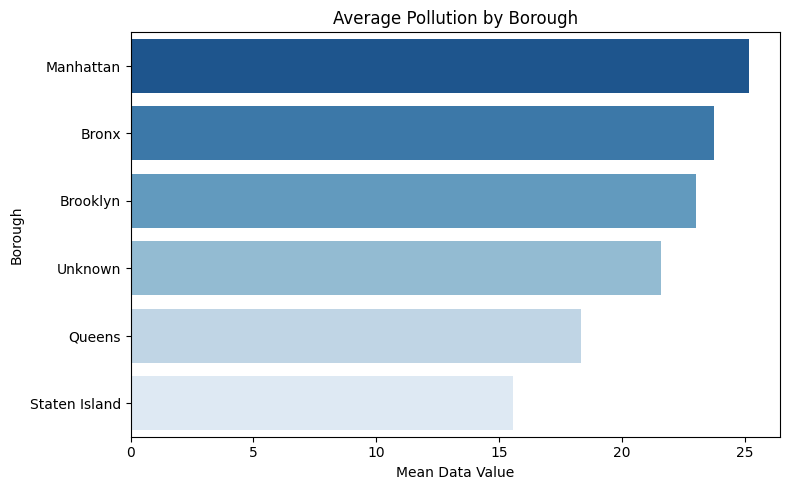

In [ ]:
# Average Pollution by Borough
borough_avg = nyc_aq.groupby('geo_place_name')['data_value'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='data_value', y='geo_place_name', data=borough_avg.sort_values('data_value', ascending=False), palette='Blues_r')
plt.title("Average Pollution by Borough")
plt.xlabel("Mean Data Value")
plt.ylabel("Borough")
plt.tight_layout()
plt.show()


C:\Users\birbm\AppData\Local\Temp\ipykernel_8656\3623018372.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='data_value', y='geo_place_name', data=filtered_borough_avg.sort_values('data_value', ascending=False), palette='Blues_r')


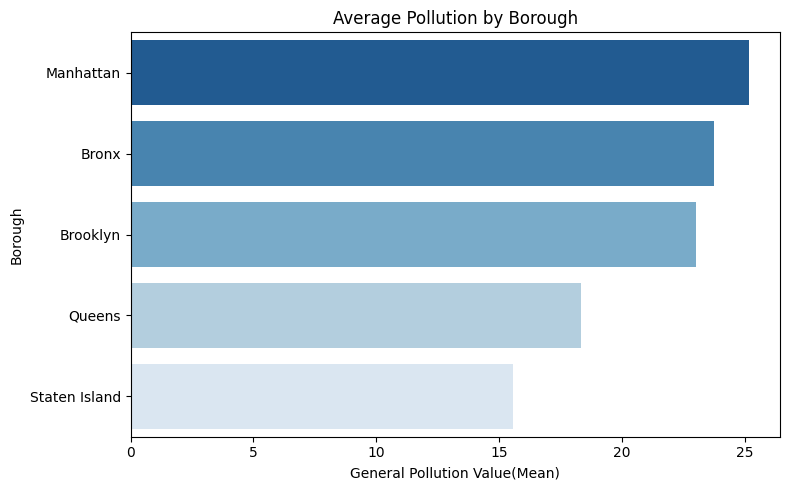

In [ ]:

# Filter out 'Unknown' from borough analysis
filtered_borough_avg = nyc_aq[nyc_aq['geo_place_name'] != 'Unknown']     .groupby('geo_place_name')['data_value'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='data_value', y='geo_place_name', data=filtered_borough_avg.sort_values('data_value', ascending=False), palette='Blues_r')
plt.title("Average Pollution by Borough")
plt.xlabel("General Pollution Value(Mean)")
plt.ylabel("Borough")
plt.tight_layout()
plt.show()



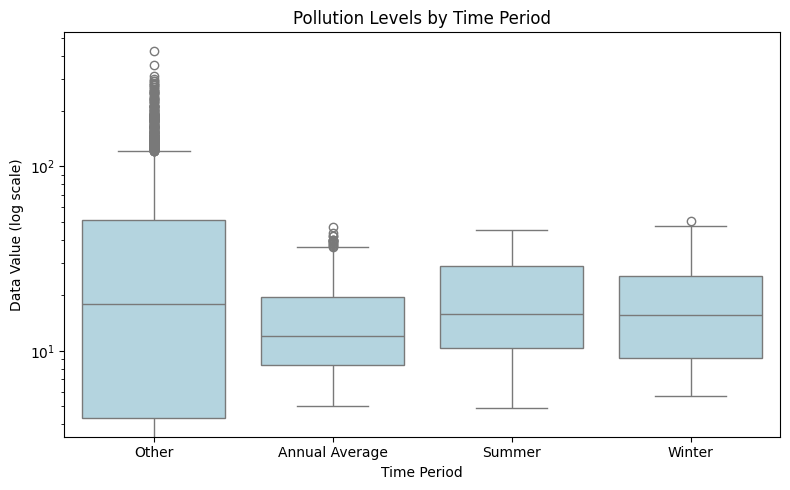

In [ ]:
# Log scale boxplot by time period
plt.figure(figsize=(8, 5))
sns.boxplot(x='time_period', y='data_value', data=nyc_aq, color='lightblue')
plt.yscale('log')
plt.title("Pollution Levels by Time Period")
plt.xlabel("Time Period")
plt.ylabel("Data Value (log scale)")
plt.tight_layout()
plt.show()



In [ ]:
# Highest General Pollution Recorded
top_polluted = nyc_aq[nyc_aq['geo_place_name'] != 'Unknown']     .sort_values('data_value', ascending=False)[['start_date', 'geo_place_name', 'measure', 'data_value']].head()
print("Highest General Pollution Recorded:")
print(top_polluted)


Highest General Pollution Recorded:
     start_date geo_place_name measure  data_value
9519 2012-01-02          Bronx   Rates       232.6
4967 2005-01-01          Bronx   Rates       212.5
9978 2012-01-02          Bronx   Rates       210.4
889  2012-01-02          Bronx   Rates       191.4
8948 2015-01-01          Bronx   Rates       187.8


In [ ]:
# Average pollution per year
pollution_summary = nyc_aq.groupby('year')['data_value'].mean().reset_index()
print("Yearly Average Pollution:")
print(pollution_summary)


Yearly Average Pollution:
    year  data_value
0   2005   41.013712
1   2008   20.284752
2   2009   26.054104
3   2010   27.236468
4   2011   15.532723
5   2012   25.545331
6   2013   19.161096
7   2014   16.094257
8   2015   21.143423
9   2016   18.145957
10  2017   20.186776
11  2018   15.566160
12  2019   24.718502
13  2020   14.419453
14  2021   14.736879
15  2022   14.785532


In [ ]:
# Linear regression model on air_quality_category
nyc_aq['air_quality_category'] = pd.Categorical(
    nyc_aq['air_quality_category'], categories=['Good', 'Moderate', 'Bad'], ordered=True
)
model = smf.ols("data_value ~ air_quality_category", data=nyc_aq).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             data_value   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     5997.
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        22:12:30   Log-Likelihood:                -78204.
No. Observations:               18016   AIC:                         1.564e+05
Df Residuals:                   18013   BIC:                         1.564e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

C:\Users\birbm\AppData\Local\Temp\ipykernel_8656\3963752685.py:4: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='air_quality_category', y='data_value', data=nyc_aq, color='red', join=False)


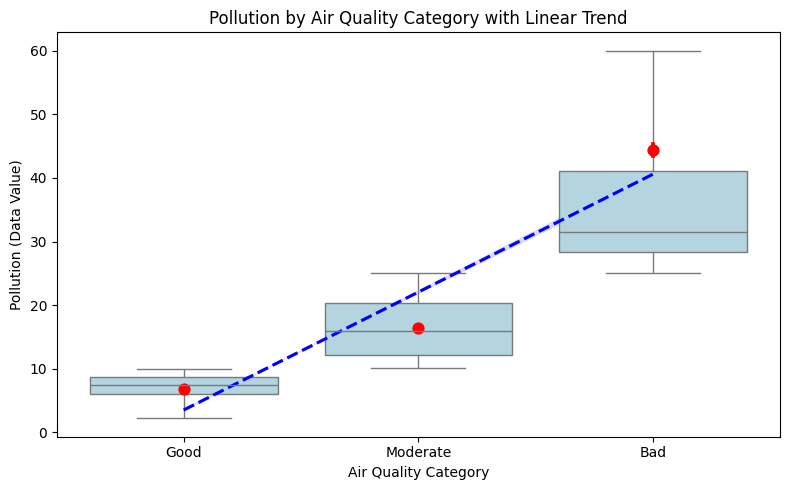

In [ ]:
# Visualizing regression results
plt.figure(figsize=(8, 5))
sns.boxplot(x='air_quality_category', y='data_value', data=nyc_aq, color='lightblue', showfliers=False)
sns.pointplot(x='air_quality_category', y='data_value', data=nyc_aq, color='red', join=False)
sns.regplot(x=nyc_aq['air_quality_category'].cat.codes, y=nyc_aq['data_value'], scatter=False, color='blue', line_kws={"linestyle":"--"})
plt.title("Pollution by Air Quality Category with Linear Trend")
plt.xlabel("Air Quality Category")
plt.ylabel("Pollution (Data Value)")
plt.tight_layout()
plt.show()


In [ ]:

# Simple interpretation
print("Interpretation: As air quality worsens from 'Good' to 'Bad', pollution levels increase. The red dots show the average pollution for each category, and the blue trendline confirms a consistent upward trend.")

Interpretation: As air quality worsens from 'Good' to 'Bad', pollution levels increase. The red dots show the average pollution for each category, and the blue trendline confirms a consistent upward trend.
